In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sympy import symbols
from sympy.logic.boolalg import to_dnf

In [46]:
convert_to_syms = True # converts a string presenting a function to a symbolic expression using the sympy library

In [47]:
#file_name = os.path.join("examples", "functions_XOR3_100.txt")
file_name = os.path.join("examples", "functions2.txt")

In [48]:
f = open(file_name)

data = {}
for l in f:
    s = l.strip().split(";")
    t = float(s[0].split("=")[1])
    data[t] = {}
    for func in s[1:]:
        if func:
            func,n = func.split(":")
            try:
                func = func.strip().split("=")[1]
            except:
                func = "None"
                
            if convert_to_syms:
                ins = func.replace("|", "").replace("&","").replace("~","").replace("(","").replace(")","").split()
                syms = symbols(ins)
                for i, sym in zip(ins,syms):
                    globals()[i] = sym

                func = to_dnf(func, True)

            n = int(n)
            data[t][func] = n

In [49]:
T = list(data.keys())
N = sum(data[T[0]].values())

We presume that the solution has converged to an optimal solution

In [50]:
final_sol = sorted(zip(data[t].values(), data[t].keys()))
best_sol = final_sol[0][1]
best_sol

(in_1 & ~in_2) | (in_2 & ~in_1)

In [51]:
counts = []
for t,functions in data.items():
    if best_sol in functions:
        counts.append(functions[best_sol]/N)
    else:
        counts.append(0)          

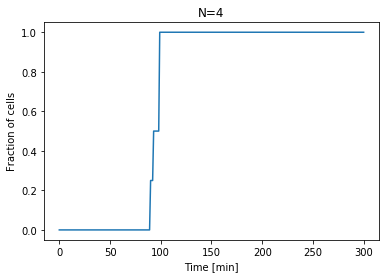

In [52]:
plt.plot(T,counts)
plt.xlabel("Time [min]")
plt.ylabel("Fraction of cells")
plt.title(f"N={N}")
plt.show()